# 09 Auto Correlation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  # For loading audio files
import librosa
import librosa.display


# Function to compute short-term autocorrelation

In [2]:
def short_term_autocorrelation(signal, window_size):
    autocorrelation = np.correlate(signal, signal, mode='full')
    autocorrelation = autocorrelation[len(autocorrelation)//2:]
    autocorrelation = autocorrelation[:window_size]
    return autocorrelation

# Function to classify voiced and unvoiced segments using autocorrelation

In [3]:
def classify_voiced_unvoiced(signal, sampling_rate):
    window_length = len(signal)
    autocorrelation = short_term_autocorrelation(signal, window_length)
    peak_index = np.argmax(autocorrelation)
    fundamental_frequency = sampling_rate / peak_index
    threshold = 100  # Adjust this threshold as needed
    if fundamental_frequency > threshold:
        return 'voiced', fundamental_frequency
    else:
        return 'unvoiced', fundamental_frequency

# Load speech signal

In [4]:
file_path = r'C:\Users\ibnes\OneDrive\Documents\Sound Recordings\Voice.wav'  # Change this to your audio file path
signal, sampling_rate = sf.read(file_path)

# Convert to mono if stereo # Normalize the signal # Set window size for short-term autocorrelation 


In [5]:

if len(signal.shape) > 1:
    signal = signal.mean(axis=1)


signal = signal / np.max(np.abs(signal))

window_size = 500

# Classify voiced and unvoiced segments

In [6]:
voiced_segments = []
unvoiced_segments = []
segment_lengths = []
i = 0
while i < len(signal):
    segment = signal[i:i+window_size]
    segment_type, _ = classify_voiced_unvoiced(segment, sampling_rate)
    if segment_type == 'voiced':
        voiced_segments.append(segment)
    else:
        unvoiced_segments.append(segment)
    segment_lengths.append(len(segment))
    i += window_size

C:\Users\ibnes\AppData\Local\Temp\ipykernel_3260\3259571221.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  fundamental_frequency = sampling_rate / peak_index


# Flatten the segments into single arrays

In [7]:
voiced_signal = np.concatenate(voiced_segments)
unvoiced_signal = np.zeros(len(signal)) if len(unvoiced_segments) == 0 else np.concatenate(unvoiced_segments)


# Compute short-term autocorrelation for the original, voiced, and unvoiced signals

In [8]:

autocorrelation_original = short_term_autocorrelation(signal, window_size)
autocorrelation_voiced = short_term_autocorrelation(voiced_signal, window_size)
autocorrelation_unvoiced = short_term_autocorrelation(unvoiced_signal, window_size)

# Plotting

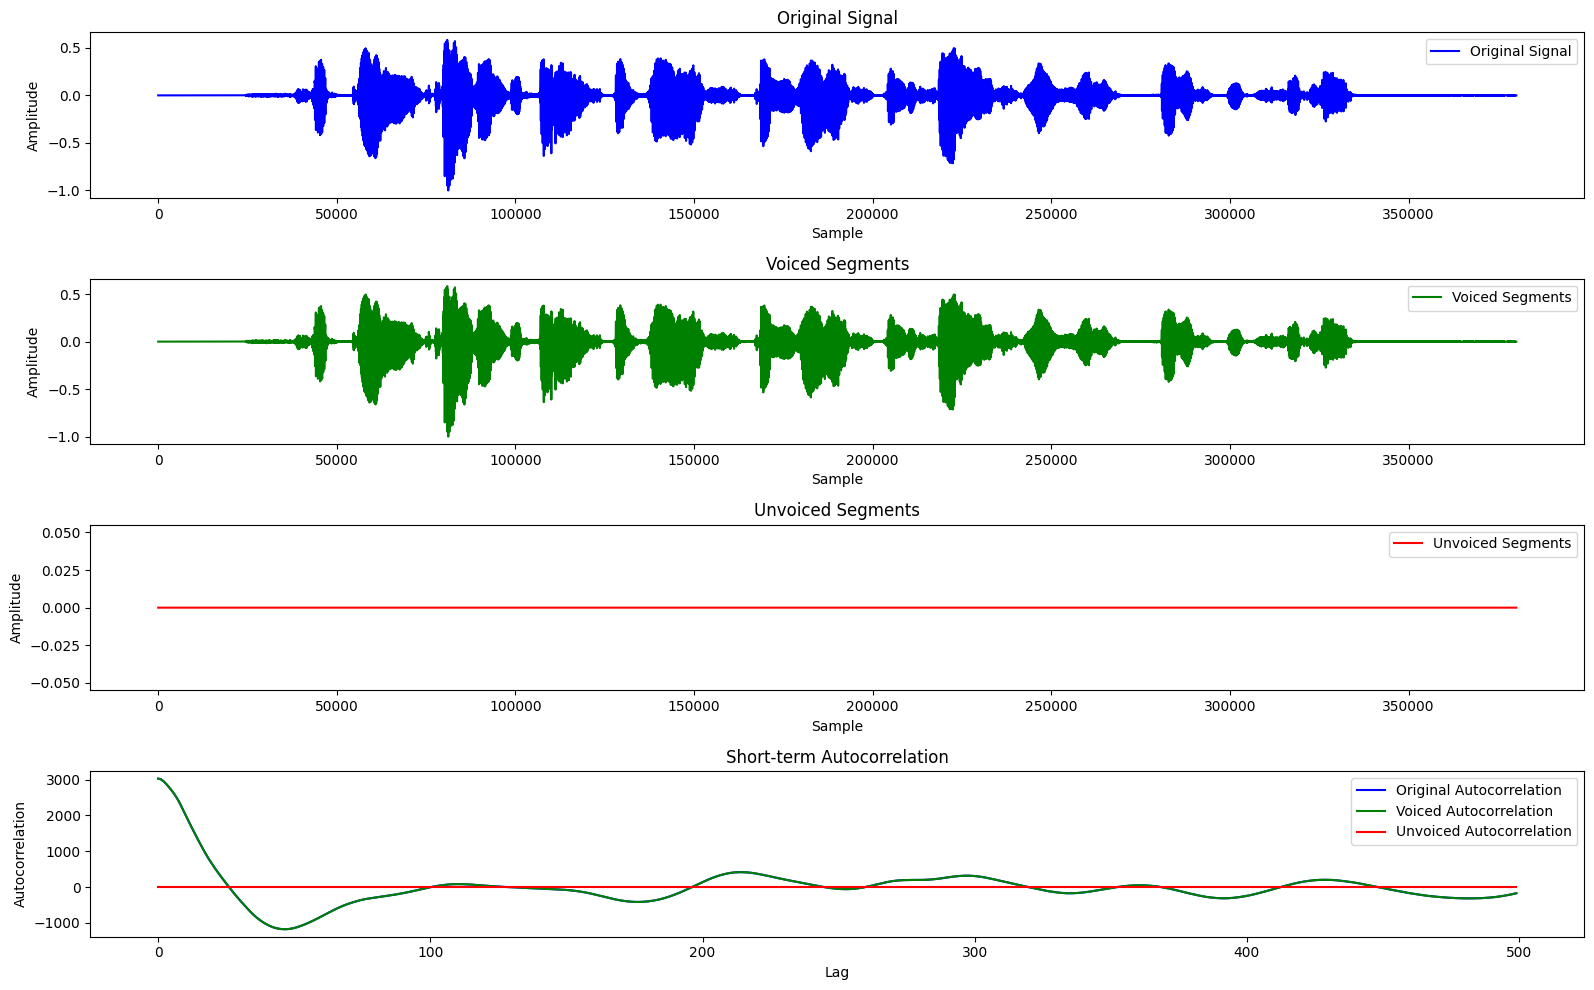

In [9]:
plt.figure(figsize=(16, 10))

# Plot original signal
plt.subplot(4, 1, 1)
plt.plot(signal, label='Original Signal', color='blue')
plt.title('Original Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

# Plot voiced segments
plt.subplot(4, 1, 2)
plt.plot(voiced_signal, label='Voiced Segments', color='green')
plt.title('Voiced Segments')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

# Plot unvoiced segments
plt.subplot(4, 1, 3)
plt.plot(unvoiced_signal, label='Unvoiced Segments', color='red')
plt.title('Unvoiced Segments')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

# Plot short-term autocorrelation
plt.subplot(4, 1, 4)
plt.plot(autocorrelation_original, label='Original Autocorrelation', color='blue')
plt.plot(autocorrelation_voiced, label='Voiced Autocorrelation', color='green')
plt.plot(autocorrelation_unvoiced, label='Unvoiced Autocorrelation', color='red')
plt.title('Short-term Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()

plt.tight_layout()
plt.show()
